In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
link = "C:/Users/CarlosViniMSouza/Documents/Projects/data-mining-ifam/database/result.csv"

dataset = pd.read_csv(link)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               17908 non-null  int64  
 1   pay_schedule_1           17908 non-null  int64  
 2   pay_schedule_2           17908 non-null  int64  
 3   pay_schedule_3           17908 non-null  int64  
 4   pay_schedule_4           17908 non-null  int64  
 5   home_owner               17908 non-null  int64  
 6   income                   17908 non-null  float64
 7   current_address_year     17908 non-null  int64  
 8   has_debt                 17908 non-null  int64  
 9   amount_requested         17908 non-null  float64
 10  risk_score               17908 non-null  float64
 11  risk_score_2             17908 non-null  float64
 12  risk_score_3             17908 non-null  float64
 13  ext_quality_score        17908 non-null  float64
 14  ext_quality_score_2   

In [18]:
dataset.describe().T # 'T' vai transpor a tabela

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,17908.0,8953.500000,5169.738646,0.000000,4476.750000,8953.500000,13430.250000,17907.000000
pay_schedule_1,17908.0,0.598392,0.490237,0.000000,0.000000,1.000000,1.000000,1.000000
pay_schedule_2,17908.0,0.206388,0.404724,0.000000,0.000000,0.000000,0.000000,1.000000
pay_schedule_3,17908.0,0.111905,0.315259,0.000000,0.000000,0.000000,0.000000,1.000000
pay_schedule_4,17908.0,0.083315,0.276365,0.000000,0.000000,0.000000,0.000000,1.000000
home_owner,17908.0,0.425173,0.494383,0.000000,0.000000,0.000000,1.000000,1.000000
income,17908.0,36.572147,15.048901,9.050000,25.800000,32.600000,46.700000,99.850000
current_address_year,17908.0,3.584711,2.751937,0.000000,2.000000,3.000000,5.000000,12.000000
has_debt,17908.0,0.795399,0.403421,0.000000,1.000000,1.000000,1.000000,1.000000
amount_requested,17908.0,95.044645,69.854368,35.000000,60.000000,70.000000,110.000000,1020.000000


In [19]:
X = dataset.drop(['e_signed'], axis=1)
y = dataset['e_signed']

In [20]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion="entropy", n_estimators=100, max_depth=10)

In [31]:
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.7393550188468518

In [32]:
rfc.fit(X_test, y_test)
rfc.score(X_test, y_test)

0.8972640982691233

In [33]:
y_pred = rfc.predict(X_test)
score = rfc.score(X_test, y_test)

print(score)

0.8972640982691233


DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)


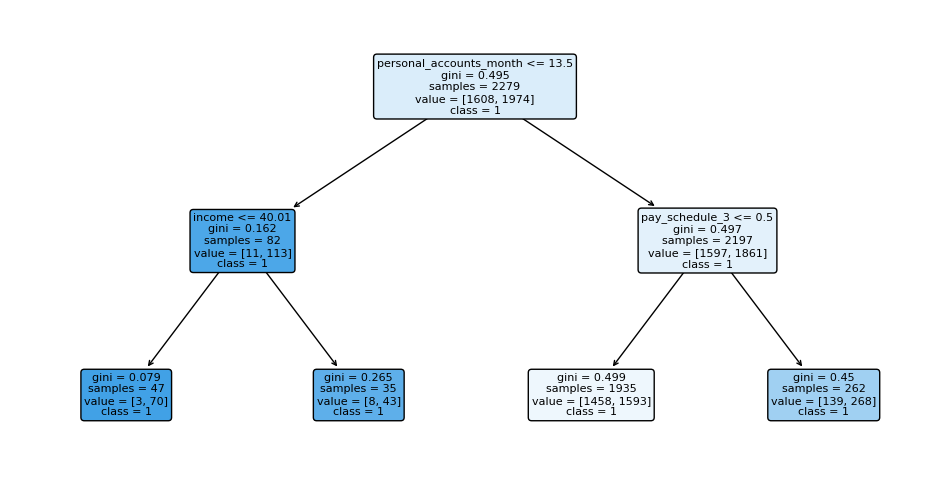

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1273642419)


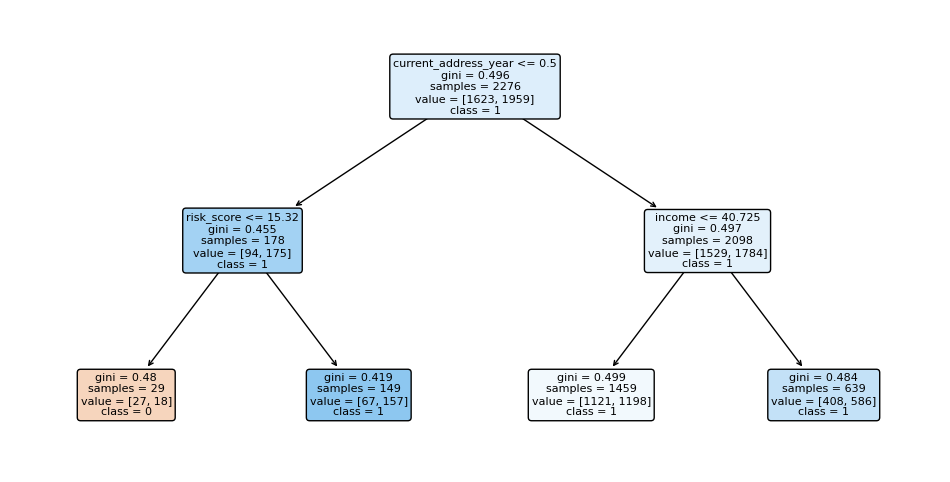

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1935803228)


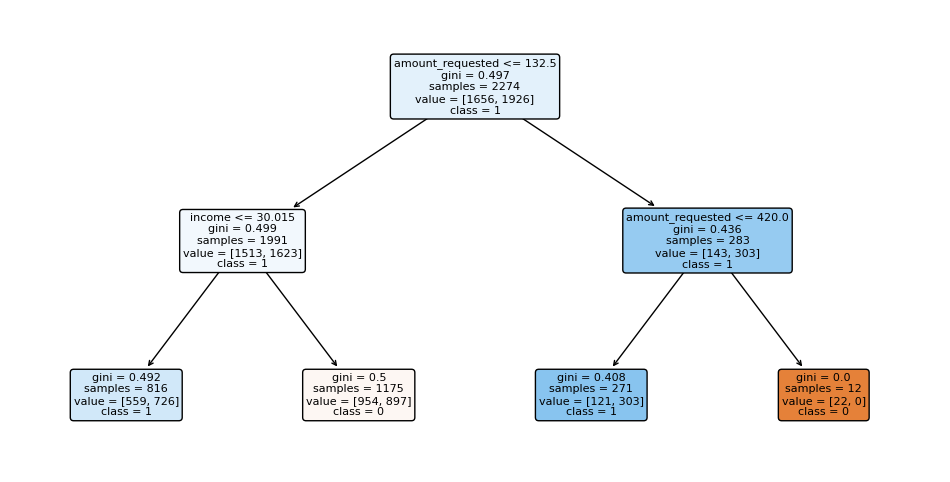

DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=787846414)


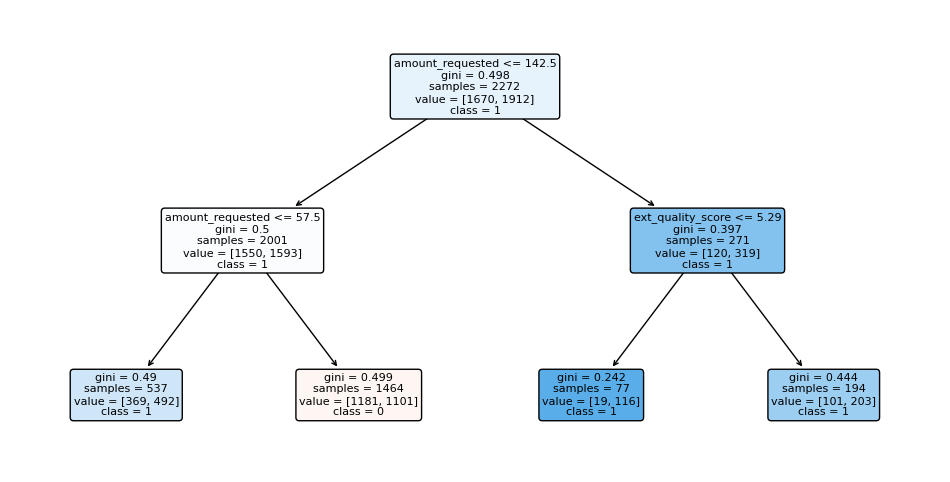

DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=996406378)


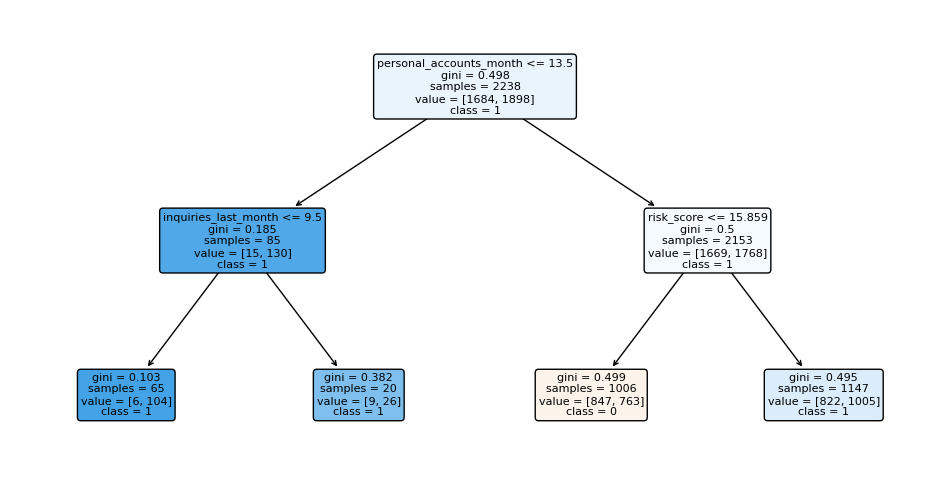

In [25]:
from sklearn import tree

features = X.columns.values
classes = ['0', '1']


for estimator in rfc.estimators_:
    print(estimator)

    plt.figure(figsize=(12,6))

    tree.plot_tree(
        estimator,
        feature_names=features,
        class_names=classes,
        fontsize=8, 
        filled=True, 
        rounded=True
    )
    
    plt.show()

              precision    recall  f1-score   support

           0       0.62      0.13      0.22      1652
           1       0.56      0.93      0.70      1930

    accuracy                           0.56      3582
   macro avg       0.59      0.53      0.46      3582
weighted avg       0.59      0.56      0.48      3582



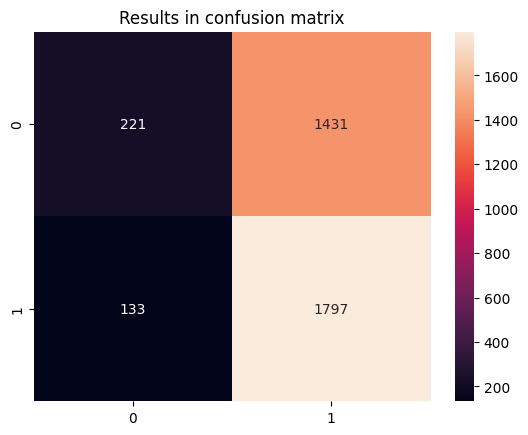

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

confMatrix = confusion_matrix(y_test, y_pred)

sns \
    .heatmap(confMatrix, annot=True, fmt='d') \
    .set_title('Results in confusion matrix')

print(classification_report(y_test, y_pred))

[See More](https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/)